In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [258]:
data = pd.read_excel('datafile.xls')
data.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,station_code,station_name,station_type,state_name,district_name,block_name,basin_name,sub_basin_name,agency_name,date_collection,...,TRITIUM,SOLIDS(TOTAL),TURBIDITY(NTU),URANIUM,ZINC(mg/L),"NITROGEN,NITRITE.1",CALCIUM CARBONATE,MAGNESIUM CARBONATE,BIOCHEMICAL OXYGEN DEAMND,MAGNESIUM HARDNESS
0,CPCB_1158,MANER AT SOMNAPALLI,Surface Water,Andhra Pradesh,Warangal,THORRUR,Godavari Basin,Pranhita and others,CPCB,08-03-2021 00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CPCB_1174,TUNGABHADRA AT KURNOOL U/S BHAVAPURAM KURNOOL,Surface Water,Andhra Pradesh,KURNOOL,KURNOOL,Krishna Basin,Tungabhadra Lower,CPCB,07-03-2021 00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CPCB_1175,KRISHNA A/C WITH TUNGABHADRA SANGAMESHWARAM KU...,Surface Water,Andhra Pradesh,KURNOOL,PAGIDYALA,Krishna Basin,Krishna Middle,CPCB,14-03-2021 00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CPCB_1178,PALLERU B/C WITH KRISHNA JAGGAIAPET,Surface Water,Andhra Pradesh,KRISHNA,JAGGAYYAPETA,Krishna Basin,Krishna Lower,CPCB,24-03-2021 00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CPCB_1215,MANER AT WARANGAL U/S (RIVER MANERU AT THUMMAL...,Surface Water,Andhra Pradesh,Warangal,THORRUR,Krishna Basin,Krishna Lower,CPCB,10-03-2021 00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [259]:
data.shape

(2290, 97)

In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 97 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   station_code                       2290 non-null   object 
 1   station_name                       2290 non-null   object 
 2   station_type                       2290 non-null   object 
 3   state_name                         2290 non-null   object 
 4   district_name                      2290 non-null   object 
 5   block_name                         2268 non-null   object 
 6   basin_name                         2287 non-null   object 
 7   sub_basin_name                     2287 non-null   object 
 8   agency_name                        2290 non-null   object 
 9   date_collection                    2290 non-null   object 
 10  _24d                               0 non-null      float64
 11  _401                               0 non-null      float

In [261]:
data = data.dropna(how = 'all', axis = 1)

In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   station_code                     2290 non-null   object 
 1   station_name                     2290 non-null   object 
 2   station_type                     2290 non-null   object 
 3   state_name                       2290 non-null   object 
 4   district_name                    2290 non-null   object 
 5   block_name                       2268 non-null   object 
 6   basin_name                       2287 non-null   object 
 7   sub_basin_name                   2287 non-null   object 
 8   agency_name                      2290 non-null   object 
 9   date_collection                  2290 non-null   object 
 10  BORON(mg/L)                      44 non-null     float64
 11  BIOCHEMICAL OXYGEN DEMAND(mg/L)  1869 non-null   float64
 12  FECAL STREPTOCOCCI(M

In [263]:
data.isnull().sum()

station_code                          0
station_name                          0
station_type                          0
state_name                            0
district_name                         0
block_name                           22
basin_name                            3
sub_basin_name                        3
agency_name                           0
date_collection                       0
BORON(mg/L)                        2246
BIOCHEMICAL OXYGEN DEMAND(mg/L)     421
FECAL STREPTOCOCCI(MPN/100ml)      1856
DISSOLVED OXYGEN(mg/L).1            168
False                              1793
FECAL COLIFORMS(mpn/100ml)          860
AMMONIA-N(mg/L)                    1886
PH.1                                 66
SODIUM ABSORPTION RATIO            2115
TOTAL COLIFORNS(MPN/100ml)         1814
dtype: int64

In [264]:
data.drop(['BORON(mg/L)', 'FECAL STREPTOCOCCI(MPN/100ml)', 'FECAL COLIFORMS(mpn/100ml)', 
          'AMMONIA-N(mg/L)', 'SODIUM ABSORPTION RATIO', 'TOTAL COLIFORNS(MPN/100ml)'], axis = 1, inplace = True)

In [265]:
data.columns

Index([                   'station_code',                    'station_name',
                          'station_type',                      'state_name',
                         'district_name',                      'block_name',
                            'basin_name',                  'sub_basin_name',
                           'agency_name',                 'date_collection',
       'BIOCHEMICAL OXYGEN DEMAND(mg/L)',        'DISSOLVED OXYGEN(mg/L).1',
                                   False,                            'PH.1'],
      dtype='object')

In [266]:
data.head()

,station_code,station_name,station_type,state_name,district_name,block_name,basin_name,sub_basin_name,agency_name,date_collection,BIOCHEMICAL OXYGEN DEMAND(mg/L),DISSOLVED OXYGEN(mg/L).1,False,PH.1
0,CPCB_1158,MANER AT SOMNAPALLI,Surface Water,Andhra Pradesh,Warangal,THORRUR,Godavari Basin,Pranhita and others,CPCB,08-03-2021 00:00,2.1,5.4,NaN,7.31
1,CPCB_1174,TUNGABHADRA AT KURNOOL U/S BHAVAPURAM KURNOOL,Surface Water,Andhra Pradesh,KURNOOL,KURNOOL,Krishna Basin,Tungabhadra Lower,CPCB,07-03-2021 00:00,2.8,5.0,NaN,7.70
2,CPCB_1175,KRISHNA A/C WITH TUNGABHADRA SANGAMESHWARAM KU...,Surface Water,Andhra Pradesh,KURNOOL,PAGIDYALA,Krishna Basin,Krishna Middle,CPCB,14-03-2021 00:00,2.5,5.6,NaN,7.30
3,CPCB_1178,PALLERU B/C WITH KRISHNA JAGGAIAPET,Surface Water,Andhra Pradesh,KRISHNA,JAGGAYYAPETA,Krishna Basin,Krishna Lower,CPCB,24-03-2021 00:00,2.6,7.1,NaN,8.15
4,CPCB_1215,MANER AT WARANGAL U/S (RIVER MANERU AT THUMMAL...,Surface Water,Andhra Pradesh,Warangal,THORRUR,Krishna Basin,Krishna Lower,CPCB,10-03-2021 00:00,2.2,6.2,NaN,8.15


In [267]:
data.iloc[:, -2]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
2285     NaN
2286     NaN
2287    16.0
2288     NaN
2289    20.0
Length: 2290, dtype: float64

In [268]:
data.head()

,station_code,station_name,station_type,state_name,district_name,block_name,basin_name,sub_basin_name,agency_name,date_collection,BIOCHEMICAL OXYGEN DEMAND(mg/L),DISSOLVED OXYGEN(mg/L).1,False,PH.1
0,CPCB_1158,MANER AT SOMNAPALLI,Surface Water,Andhra Pradesh,Warangal,THORRUR,Godavari Basin,Pranhita and others,CPCB,08-03-2021 00:00,2.1,5.4,NaN,7.31
1,CPCB_1174,TUNGABHADRA AT KURNOOL U/S BHAVAPURAM KURNOOL,Surface Water,Andhra Pradesh,KURNOOL,KURNOOL,Krishna Basin,Tungabhadra Lower,CPCB,07-03-2021 00:00,2.8,5.0,NaN,7.70
2,CPCB_1175,KRISHNA A/C WITH TUNGABHADRA SANGAMESHWARAM KU...,Surface Water,Andhra Pradesh,KURNOOL,PAGIDYALA,Krishna Basin,Krishna Middle,CPCB,14-03-2021 00:00,2.5,5.6,NaN,7.30
3,CPCB_1178,PALLERU B/C WITH KRISHNA JAGGAIAPET,Surface Water,Andhra Pradesh,KRISHNA,JAGGAYYAPETA,Krishna Basin,Krishna Lower,CPCB,24-03-2021 00:00,2.6,7.1,NaN,8.15
4,CPCB_1215,MANER AT WARANGAL U/S (RIVER MANERU AT THUMMAL...,Surface Water,Andhra Pradesh,Warangal,THORRUR,Krishna Basin,Krishna Lower,CPCB,10-03-2021 00:00,2.2,6.2,NaN,8.15


In [269]:
ph1 = data.iloc[:, -1]

In [270]:
data = data.iloc[:, :-2]

In [271]:
data.head()

,station_code,station_name,station_type,state_name,district_name,block_name,basin_name,sub_basin_name,agency_name,date_collection,BIOCHEMICAL OXYGEN DEMAND(mg/L),DISSOLVED OXYGEN(mg/L).1
0,CPCB_1158,MANER AT SOMNAPALLI,Surface Water,Andhra Pradesh,Warangal,THORRUR,Godavari Basin,Pranhita and others,CPCB,08-03-2021 00:00,2.1,5.4
1,CPCB_1174,TUNGABHADRA AT KURNOOL U/S BHAVAPURAM KURNOOL,Surface Water,Andhra Pradesh,KURNOOL,KURNOOL,Krishna Basin,Tungabhadra Lower,CPCB,07-03-2021 00:00,2.8,5.0
2,CPCB_1175,KRISHNA A/C WITH TUNGABHADRA SANGAMESHWARAM KU...,Surface Water,Andhra Pradesh,KURNOOL,PAGIDYALA,Krishna Basin,Krishna Middle,CPCB,14-03-2021 00:00,2.5,5.6
3,CPCB_1178,PALLERU B/C WITH KRISHNA JAGGAIAPET,Surface Water,Andhra Pradesh,KRISHNA,JAGGAYYAPETA,Krishna Basin,Krishna Lower,CPCB,24-03-2021 00:00,2.6,7.1
4,CPCB_1215,MANER AT WARANGAL U/S (RIVER MANERU AT THUMMAL...,Surface Water,Andhra Pradesh,Warangal,THORRUR,Krishna Basin,Krishna Lower,CPCB,10-03-2021 00:00,2.2,6.2


In [272]:
data.head()

,station_code,station_name,station_type,state_name,district_name,block_name,basin_name,sub_basin_name,agency_name,date_collection,BIOCHEMICAL OXYGEN DEMAND(mg/L),DISSOLVED OXYGEN(mg/L).1
0,CPCB_1158,MANER AT SOMNAPALLI,Surface Water,Andhra Pradesh,Warangal,THORRUR,Godavari Basin,Pranhita and others,CPCB,08-03-2021 00:00,2.1,5.4
1,CPCB_1174,TUNGABHADRA AT KURNOOL U/S BHAVAPURAM KURNOOL,Surface Water,Andhra Pradesh,KURNOOL,KURNOOL,Krishna Basin,Tungabhadra Lower,CPCB,07-03-2021 00:00,2.8,5.0
2,CPCB_1175,KRISHNA A/C WITH TUNGABHADRA SANGAMESHWARAM KU...,Surface Water,Andhra Pradesh,KURNOOL,PAGIDYALA,Krishna Basin,Krishna Middle,CPCB,14-03-2021 00:00,2.5,5.6
3,CPCB_1178,PALLERU B/C WITH KRISHNA JAGGAIAPET,Surface Water,Andhra Pradesh,KRISHNA,JAGGAYYAPETA,Krishna Basin,Krishna Lower,CPCB,24-03-2021 00:00,2.6,7.1
4,CPCB_1215,MANER AT WARANGAL U/S (RIVER MANERU AT THUMMAL...,Surface Water,Andhra Pradesh,Warangal,THORRUR,Krishna Basin,Krishna Lower,CPCB,10-03-2021 00:00,2.2,6.2


In [273]:
data['PH1'] = ph1

In [274]:
data.head()

,station_code,station_name,station_type,state_name,district_name,block_name,basin_name,sub_basin_name,agency_name,date_collection,BIOCHEMICAL OXYGEN DEMAND(mg/L),DISSOLVED OXYGEN(mg/L).1,PH1
0,CPCB_1158,MANER AT SOMNAPALLI,Surface Water,Andhra Pradesh,Warangal,THORRUR,Godavari Basin,Pranhita and others,CPCB,08-03-2021 00:00,2.1,5.4,7.31
1,CPCB_1174,TUNGABHADRA AT KURNOOL U/S BHAVAPURAM KURNOOL,Surface Water,Andhra Pradesh,KURNOOL,KURNOOL,Krishna Basin,Tungabhadra Lower,CPCB,07-03-2021 00:00,2.8,5.0,7.70
2,CPCB_1175,KRISHNA A/C WITH TUNGABHADRA SANGAMESHWARAM KU...,Surface Water,Andhra Pradesh,KURNOOL,PAGIDYALA,Krishna Basin,Krishna Middle,CPCB,14-03-2021 00:00,2.5,5.6,7.30
3,CPCB_1178,PALLERU B/C WITH KRISHNA JAGGAIAPET,Surface Water,Andhra Pradesh,KRISHNA,JAGGAYYAPETA,Krishna Basin,Krishna Lower,CPCB,24-03-2021 00:00,2.6,7.1,8.15
4,CPCB_1215,MANER AT WARANGAL U/S (RIVER MANERU AT THUMMAL...,Surface Water,Andhra Pradesh,Warangal,THORRUR,Krishna Basin,Krishna Lower,CPCB,10-03-2021 00:00,2.2,6.2,8.15


In [275]:
data.shape

(2290, 13)

In [276]:
data.head()

,station_code,station_name,station_type,state_name,district_name,block_name,basin_name,sub_basin_name,agency_name,date_collection,BIOCHEMICAL OXYGEN DEMAND(mg/L),DISSOLVED OXYGEN(mg/L).1,PH1
0,CPCB_1158,MANER AT SOMNAPALLI,Surface Water,Andhra Pradesh,Warangal,THORRUR,Godavari Basin,Pranhita and others,CPCB,08-03-2021 00:00,2.1,5.4,7.31
1,CPCB_1174,TUNGABHADRA AT KURNOOL U/S BHAVAPURAM KURNOOL,Surface Water,Andhra Pradesh,KURNOOL,KURNOOL,Krishna Basin,Tungabhadra Lower,CPCB,07-03-2021 00:00,2.8,5.0,7.70
2,CPCB_1175,KRISHNA A/C WITH TUNGABHADRA SANGAMESHWARAM KU...,Surface Water,Andhra Pradesh,KURNOOL,PAGIDYALA,Krishna Basin,Krishna Middle,CPCB,14-03-2021 00:00,2.5,5.6,7.30
3,CPCB_1178,PALLERU B/C WITH KRISHNA JAGGAIAPET,Surface Water,Andhra Pradesh,KRISHNA,JAGGAYYAPETA,Krishna Basin,Krishna Lower,CPCB,24-03-2021 00:00,2.6,7.1,8.15
4,CPCB_1215,MANER AT WARANGAL U/S (RIVER MANERU AT THUMMAL...,Surface Water,Andhra Pradesh,Warangal,THORRUR,Krishna Basin,Krishna Lower,CPCB,10-03-2021 00:00,2.2,6.2,8.15


In [277]:
data.isnull().sum()

station_code                         0
station_name                         0
station_type                         0
state_name                           0
district_name                        0
block_name                          22
basin_name                           3
sub_basin_name                       3
agency_name                          0
date_collection                      0
BIOCHEMICAL OXYGEN DEMAND(mg/L)    421
DISSOLVED OXYGEN(mg/L).1           168
PH1                                 66
dtype: int64

In [278]:
# BIOCHEMICAL OXYGEN DEMAND(mg/L) column

# data.iloc[:, -3]

# filling the nan values for the above column
data['BIOCHEMICAL OXYGEN DEMAND(mg/L)'].fillna(value = data['BIOCHEMICAL OXYGEN DEMAND(mg/L)'].mean(), inplace = True)

In [279]:
data.isnull().sum()

station_code                         0
station_name                         0
station_type                         0
state_name                           0
district_name                        0
block_name                          22
basin_name                           3
sub_basin_name                       3
agency_name                          0
date_collection                      0
BIOCHEMICAL OXYGEN DEMAND(mg/L)      0
DISSOLVED OXYGEN(mg/L).1           168
PH1                                 66
dtype: int64

In [280]:
# DISSOLVED OXYGEN(mg/L).1
# data.iloc[:, -2]

data['DISSOLVED OXYGEN(mg/L).1'].fillna(data['DISSOLVED OXYGEN(mg/L).1'].mean(), inplace = True)

In [281]:
data.isnull().sum()

station_code                        0
station_name                        0
station_type                        0
state_name                          0
district_name                       0
block_name                         22
basin_name                          3
sub_basin_name                      3
agency_name                         0
date_collection                     0
BIOCHEMICAL OXYGEN DEMAND(mg/L)     0
DISSOLVED OXYGEN(mg/L).1            0
PH1                                66
dtype: int64

In [282]:
# PH1 column

data['PH1'].fillna(data['PH1'].mean(), inplace = True)

In [283]:
data.head()

,station_code,station_name,station_type,state_name,district_name,block_name,basin_name,sub_basin_name,agency_name,date_collection,BIOCHEMICAL OXYGEN DEMAND(mg/L),DISSOLVED OXYGEN(mg/L).1,PH1
0,CPCB_1158,MANER AT SOMNAPALLI,Surface Water,Andhra Pradesh,Warangal,THORRUR,Godavari Basin,Pranhita and others,CPCB,08-03-2021 00:00,2.1,5.4,7.31
1,CPCB_1174,TUNGABHADRA AT KURNOOL U/S BHAVAPURAM KURNOOL,Surface Water,Andhra Pradesh,KURNOOL,KURNOOL,Krishna Basin,Tungabhadra Lower,CPCB,07-03-2021 00:00,2.8,5.0,7.70
2,CPCB_1175,KRISHNA A/C WITH TUNGABHADRA SANGAMESHWARAM KU...,Surface Water,Andhra Pradesh,KURNOOL,PAGIDYALA,Krishna Basin,Krishna Middle,CPCB,14-03-2021 00:00,2.5,5.6,7.30
3,CPCB_1178,PALLERU B/C WITH KRISHNA JAGGAIAPET,Surface Water,Andhra Pradesh,KRISHNA,JAGGAYYAPETA,Krishna Basin,Krishna Lower,CPCB,24-03-2021 00:00,2.6,7.1,8.15
4,CPCB_1215,MANER AT WARANGAL U/S (RIVER MANERU AT THUMMAL...,Surface Water,Andhra Pradesh,Warangal,THORRUR,Krishna Basin,Krishna Lower,CPCB,10-03-2021 00:00,2.2,6.2,8.15


In [284]:
data.isnull().sum()

station_code                        0
station_name                        0
station_type                        0
state_name                          0
district_name                       0
block_name                         22
basin_name                          3
sub_basin_name                      3
agency_name                         0
date_collection                     0
BIOCHEMICAL OXYGEN DEMAND(mg/L)     0
DISSOLVED OXYGEN(mg/L).1            0
PH1                                 0
dtype: int64

In [285]:
data.dtypes

station_code                        object
station_name                        object
station_type                        object
state_name                          object
district_name                       object
block_name                          object
basin_name                          object
sub_basin_name                      object
agency_name                         object
date_collection                     object
BIOCHEMICAL OXYGEN DEMAND(mg/L)    float64
DISSOLVED OXYGEN(mg/L).1           float64
PH1                                float64
dtype: object

In [286]:
data['block_name'].nunique()

883

In [287]:
data = data.dropna()

In [288]:
data.isnull().sum()

station_code                       0
station_name                       0
station_type                       0
state_name                         0
district_name                      0
block_name                         0
basin_name                         0
sub_basin_name                     0
agency_name                        0
date_collection                    0
BIOCHEMICAL OXYGEN DEMAND(mg/L)    0
DISSOLVED OXYGEN(mg/L).1           0
PH1                                0
dtype: int64

In [289]:
data.shape

(2265, 13)

In [290]:
data.head(10)

,station_code,station_name,station_type,state_name,district_name,block_name,basin_name,sub_basin_name,agency_name,date_collection,BIOCHEMICAL OXYGEN DEMAND(mg/L),DISSOLVED OXYGEN(mg/L).1,PH1
0,CPCB_1158,MANER AT SOMNAPALLI,Surface Water,Andhra Pradesh,Warangal,THORRUR,Godavari Basin,Pranhita and others,CPCB,08-03-2021 00:00,2.1,5.4,7.31
1,CPCB_1174,TUNGABHADRA AT KURNOOL U/S BHAVAPURAM KURNOOL,Surface Water,Andhra Pradesh,KURNOOL,KURNOOL,Krishna Basin,Tungabhadra Lower,CPCB,07-03-2021 00:00,2.8,5.0,7.70
2,CPCB_1175,KRISHNA A/C WITH TUNGABHADRA SANGAMESHWARAM KU...,Surface Water,Andhra Pradesh,KURNOOL,PAGIDYALA,Krishna Basin,Krishna Middle,CPCB,14-03-2021 00:00,2.5,5.6,7.30
3,CPCB_1178,PALLERU B/C WITH KRISHNA JAGGAIAPET,Surface Water,Andhra Pradesh,KRISHNA,JAGGAYYAPETA,Krishna Basin,Krishna Lower,CPCB,24-03-2021 00:00,2.6,7.1,8.15
4,CPCB_1215,MANER AT WARANGAL U/S (RIVER MANERU AT THUMMAL...,Surface Water,Andhra Pradesh,Warangal,THORRUR,Krishna Basin,Krishna Lower,CPCB,10-03-2021 00:00,2.2,6.2,8.15
5,CPCB_1218,GODAVARI AT RAJAHMUNDRY U/S KUMARADEVAM EAST G...,Surface Water,Andhra Pradesh,WEST GODAVARI,KOVVURU,Godavari Basin,Godavari Lower,CPCB,05-03-2021 00:00,2.0,6.4,7.08
6,CPCB_1219,GODAVARI AT RAJAHMUNDRY D/S DHAVALESWARAM EAST...,Surface Water,Andhra Pradesh,EAST GODAVARI,GOKAVARAM,Godavari Basin,Godavari Lower,CPCB,08-03-2021 00:00,1.4,8.5,6.83
7,CPCB_1255,PENNAR B/C WITH CHITRAVATHI TADIPATRI UNGANOOR...,Surface Water,Andhra Pradesh,ANANTAPUR,PUTTAPARTI,Pennar Basin,Pennar Upper,CPCB,10-03-2021 00:00,2.7,4.8,7.90
8,CPCB_1256,PENNAR A/C WITH PAPAGNI PUSHPAGINI KADAPA,Surface Water,Andhra Pradesh,CUDDAPAH,CHENNUR,Pennar Basin,Pennar Lower,CPCB,04-03-2021 00:00,2.2,5.1,7.20
9,CPCB_1257,PENNAR A/C WITH CHEYYURU SOMASILA NELLORE,Surface Water,Andhra Pradesh,CUDDAPAH,PENAGALUR,Pennar Basin,Pennar Lower,CPCB,08-03-2021 00:00,2.4,7.2,8.09


In [291]:
for i in data['state_name'].unique():
    print(data[data['state_name'] == i].shape)
    print(data[data['state_name'] == i]['station_name'].nunique())

(129, 13)
129
(1, 13)
1
(128, 13)
128
(118, 13)
91
(6, 13)
6
(45, 13)
45
(1, 13)
1
(3, 13)
3
(4, 13)
4
(53, 13)
53
(83, 13)
83
(18, 13)
18
(141, 13)
141
(17, 13)
17
(33, 13)
33
(252, 13)
247
(92, 13)
92
(171, 13)
171
(155, 13)
155
(21, 13)
21
(70, 13)
70
(49, 13)
49
(16, 13)
16
(152, 13)
152
(1, 13)
1
(42, 13)
42
(33, 13)
33
(12, 13)
12
(80, 13)
80
(67, 13)
67
(63, 13)
63
(32, 13)
26
(97, 13)
79
(80, 13)
67


In [292]:
data['state_name'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttarakhand', 'Uttar Pradesh', 'West Bengal'], dtype=object)

### Checking unique values to clean the data

In [293]:
data['station_code'].nunique()

2201

In [294]:
data['station_name'].nunique()

2196

In [295]:
data['station_type'].nunique()

1

In [296]:
data = data.iloc[:, 3:]

In [297]:
data.head()

,state_name,district_name,block_name,basin_name,sub_basin_name,agency_name,date_collection,BIOCHEMICAL OXYGEN DEMAND(mg/L),DISSOLVED OXYGEN(mg/L).1,PH1
0,Andhra Pradesh,Warangal,THORRUR,Godavari Basin,Pranhita and others,CPCB,08-03-2021 00:00,2.1,5.4,7.31
1,Andhra Pradesh,KURNOOL,KURNOOL,Krishna Basin,Tungabhadra Lower,CPCB,07-03-2021 00:00,2.8,5.0,7.70
2,Andhra Pradesh,KURNOOL,PAGIDYALA,Krishna Basin,Krishna Middle,CPCB,14-03-2021 00:00,2.5,5.6,7.30
3,Andhra Pradesh,KRISHNA,JAGGAYYAPETA,Krishna Basin,Krishna Lower,CPCB,24-03-2021 00:00,2.6,7.1,8.15
4,Andhra Pradesh,Warangal,THORRUR,Krishna Basin,Krishna Lower,CPCB,10-03-2021 00:00,2.2,6.2,8.15


In [298]:
data['state_name'].nunique()

34

In [299]:
data.state_name.unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttarakhand', 'Uttar Pradesh', 'West Bengal'], dtype=object)

In [300]:
data.head()

,state_name,district_name,block_name,basin_name,sub_basin_name,agency_name,date_collection,BIOCHEMICAL OXYGEN DEMAND(mg/L),DISSOLVED OXYGEN(mg/L).1,PH1
0,Andhra Pradesh,Warangal,THORRUR,Godavari Basin,Pranhita and others,CPCB,08-03-2021 00:00,2.1,5.4,7.31
1,Andhra Pradesh,KURNOOL,KURNOOL,Krishna Basin,Tungabhadra Lower,CPCB,07-03-2021 00:00,2.8,5.0,7.70
2,Andhra Pradesh,KURNOOL,PAGIDYALA,Krishna Basin,Krishna Middle,CPCB,14-03-2021 00:00,2.5,5.6,7.30
3,Andhra Pradesh,KRISHNA,JAGGAYYAPETA,Krishna Basin,Krishna Lower,CPCB,24-03-2021 00:00,2.6,7.1,8.15
4,Andhra Pradesh,Warangal,THORRUR,Krishna Basin,Krishna Lower,CPCB,10-03-2021 00:00,2.2,6.2,8.15


In [301]:
data[data['state_name'] == 'Andhra Pradesh']['district_name'].nunique()

17

In [302]:
data[data['state_name'] == 'Andhra Pradesh']

,state_name,district_name,block_name,basin_name,sub_basin_name,agency_name,date_collection,BIOCHEMICAL OXYGEN DEMAND(mg/L),DISSOLVED OXYGEN(mg/L).1,PH1
0,Andhra Pradesh,Warangal,THORRUR,Godavari Basin,Pranhita and others,CPCB,08-03-2021 00:00,2.1,5.400000,7.31
1,Andhra Pradesh,KURNOOL,KURNOOL,Krishna Basin,Tungabhadra Lower,CPCB,07-03-2021 00:00,2.8,5.000000,7.70
2,Andhra Pradesh,KURNOOL,PAGIDYALA,Krishna Basin,Krishna Middle,CPCB,14-03-2021 00:00,2.5,5.600000,7.30
3,Andhra Pradesh,KRISHNA,JAGGAYYAPETA,Krishna Basin,Krishna Lower,CPCB,24-03-2021 00:00,2.6,7.100000,8.15
4,Andhra Pradesh,Warangal,THORRUR,Krishna Basin,Krishna Lower,CPCB,10-03-2021 00:00,2.2,6.200000,8.15
...,...,...,...,...,...,...,...,...,...,...
124,Andhra Pradesh,Rangareddy,RAJENDRANAGAR,Krishna Basin,Krishna Lower,CPCB,05-03-2021 00:00,22.0,6.617672,8.30
125,Andhra Pradesh,Rangareddy,RAJENDRANAGAR,Krishna Basin,Krishna Lower,CPCB,03-03-2021 00:00,8.0,3.500000,7.86
126,Andhra Pradesh,Rangareddy,RAJENDRANAGAR,Krishna Basin,Krishna Lower,CPCB,04-03-2021 00:00,12.0,6.617672,7.47
127,Andhra Pradesh,Rangareddy,RAJENDRANAGAR,Krishna Basin,Krishna Lower,CPCB,06-03-2021 00:00,6.0,1.100000,7.28


In [303]:
data.head()

,state_name,district_name,block_name,basin_name,sub_basin_name,agency_name,date_collection,BIOCHEMICAL OXYGEN DEMAND(mg/L),DISSOLVED OXYGEN(mg/L).1,PH1
0,Andhra Pradesh,Warangal,THORRUR,Godavari Basin,Pranhita and others,CPCB,08-03-2021 00:00,2.1,5.4,7.31
1,Andhra Pradesh,KURNOOL,KURNOOL,Krishna Basin,Tungabhadra Lower,CPCB,07-03-2021 00:00,2.8,5.0,7.70
2,Andhra Pradesh,KURNOOL,PAGIDYALA,Krishna Basin,Krishna Middle,CPCB,14-03-2021 00:00,2.5,5.6,7.30
3,Andhra Pradesh,KRISHNA,JAGGAYYAPETA,Krishna Basin,Krishna Lower,CPCB,24-03-2021 00:00,2.6,7.1,8.15
4,Andhra Pradesh,Warangal,THORRUR,Krishna Basin,Krishna Lower,CPCB,10-03-2021 00:00,2.2,6.2,8.15


In [304]:
data['basin_name'].nunique()

22

In [305]:
data['basin_name'].unique()

array(['Godavari Basin', 'Krishna Basin', 'Pennar Basin',
       'East flowing rivers between Mahanadi and Pennar Basin',
       'East flowing rivers between Pennar and Kanyakumari Basin', ' ',
       'Brahamaputra Basin', 'Barak and Others Basin', 'Ganga Basin',
       'Indus (Up to border) Basin', 'Mahanadi Basin',
       'West flowing rivers from Tapi to Tadri Basin', 'Sabarmati Basin',
       'Mahi Basin', 'Narmada Basin', 'Tapi Basin',
       'West flowing rivers of Kutch and Saurashtra including Luni Basin',
       'Brahmani and Baitarni Basin', 'Subernarekha Basin',
       'Cauvery Basin',
       'West flowing rivers from Tadri to Kanyakumari Basin',
       'Minor rivers draining into Myanmar and Bangladesh Basin'],
      dtype=object)

In [306]:
for i in data['basin_name'].unique():
    print(data[data['basin_name'] == i]['sub_basin_name'].shape)
    print(data[data['basin_name'] == i]['sub_basin_name'].nunique())

(133,)
8
(192,)
7
(5,)
2
(35,)
3
(107,)
3
(35,)
1
(190,)
2
(143,)
3
(446,)
19
(196,)
6
(96,)
3
(135,)
2
(22,)
2
(27,)
2
(90,)
3
(21,)
3
(15,)
5
(59,)
2
(28,)
1
(151,)
3
(99,)
3
(40,)
4


In [307]:
data['agency_name'].unique()

array(['CPCB'], dtype=object)

In [308]:
data.drop('agency_name', axis = 1, inplace = True)

In [309]:
data.shape

(2265, 9)

In [310]:
data.head()

,state_name,district_name,block_name,basin_name,sub_basin_name,date_collection,BIOCHEMICAL OXYGEN DEMAND(mg/L),DISSOLVED OXYGEN(mg/L).1,PH1
0,Andhra Pradesh,Warangal,THORRUR,Godavari Basin,Pranhita and others,08-03-2021 00:00,2.1,5.4,7.31
1,Andhra Pradesh,KURNOOL,KURNOOL,Krishna Basin,Tungabhadra Lower,07-03-2021 00:00,2.8,5.0,7.70
2,Andhra Pradesh,KURNOOL,PAGIDYALA,Krishna Basin,Krishna Middle,14-03-2021 00:00,2.5,5.6,7.30
3,Andhra Pradesh,KRISHNA,JAGGAYYAPETA,Krishna Basin,Krishna Lower,24-03-2021 00:00,2.6,7.1,8.15
4,Andhra Pradesh,Warangal,THORRUR,Krishna Basin,Krishna Lower,10-03-2021 00:00,2.2,6.2,8.15


# EDA

### Checking the ph level of the water of various basins

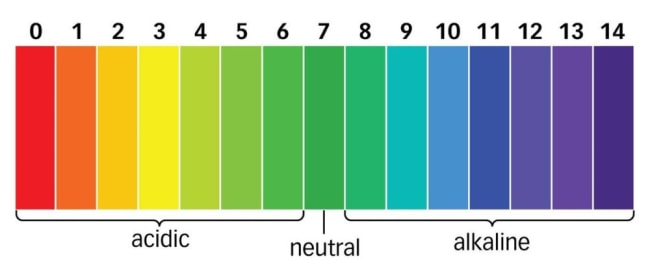

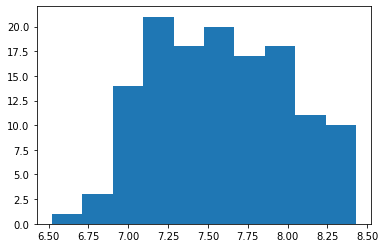

In [311]:
plt.hist(data[data['basin_name'] == 'Godavari Basin']['PH1'])
plt.show()

# From the below histogram we see that the ph value of water in godavari basin ranges between 6.5 to 8.5

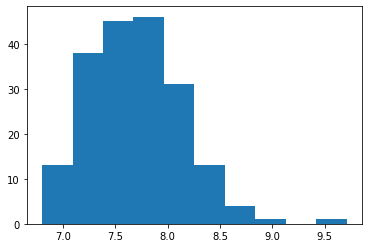

In [312]:
plt.hist(data[data['basin_name'] == 'Krishna Basin']['PH1'])
plt.show()

# ph for krishna basin ranges between 6.5 to 10 which means that this water is more basic in nature

In [313]:
data['basin_name'].unique()

array(['Godavari Basin', 'Krishna Basin', 'Pennar Basin',
       'East flowing rivers between Mahanadi and Pennar Basin',
       'East flowing rivers between Pennar and Kanyakumari Basin', ' ',
       'Brahamaputra Basin', 'Barak and Others Basin', 'Ganga Basin',
       'Indus (Up to border) Basin', 'Mahanadi Basin',
       'West flowing rivers from Tapi to Tadri Basin', 'Sabarmati Basin',
       'Mahi Basin', 'Narmada Basin', 'Tapi Basin',
       'West flowing rivers of Kutch and Saurashtra including Luni Basin',
       'Brahmani and Baitarni Basin', 'Subernarekha Basin',
       'Cauvery Basin',
       'West flowing rivers from Tadri to Kanyakumari Basin',
       'Minor rivers draining into Myanmar and Bangladesh Basin'],
      dtype=object)

In [314]:
for i in data['basin_name'].unique():
    print(data[data['basin_name'] == i].shape)

(133, 9)
(192, 9)
(5, 9)
(35, 9)
(107, 9)
(35, 9)
(190, 9)
(143, 9)
(446, 9)
(196, 9)
(96, 9)
(135, 9)
(22, 9)
(27, 9)
(90, 9)
(21, 9)
(15, 9)
(59, 9)
(28, 9)
(151, 9)
(99, 9)
(40, 9)


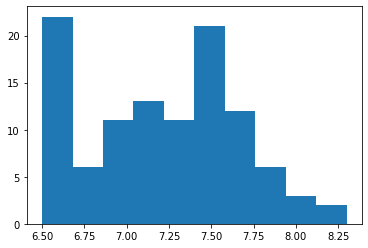

In [315]:
plt.hist(data[data['basin_name'] == 'East flowing rivers between Pennar and Kanyakumari Basin']['PH1'])
plt.show()

# ph values ranges between 6.5 to 8.5

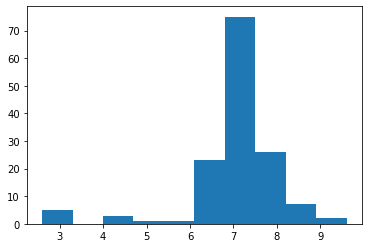

In [316]:
plt.hist(data[data['basin_name'] == 'Barak and Others Basin']['PH1'])
plt.show()

# ph value ranges between 2 and 10 implies that the water is acidic in nature

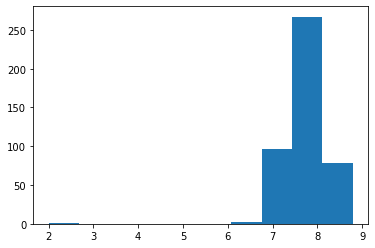

In [317]:
plt.hist(data[data['basin_name'] == 'Ganga Basin']['PH1'])
plt.show()

# ph value ranges between 6 to 9 and is having neutral ph

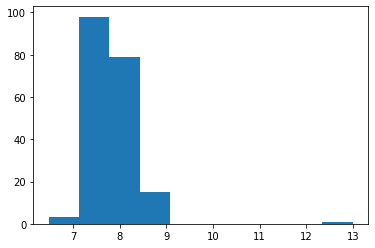

In [318]:
plt.hist(data[data['basin_name'] == 'Indus (Up to border) Basin']['PH1'])
plt.show()

# most ph value ranges between 6 to 9 and is having neutral ph and in 
# some portion the ph is recorded to be very basic near to 14

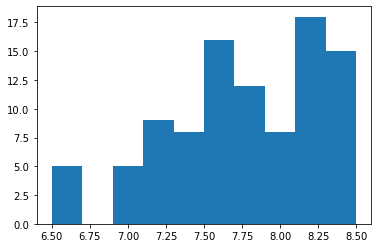

In [319]:
plt.hist(data[data['basin_name'] == 'Mahanadi Basin']['PH1'])
plt.show()

# The ph of this water is neutral in nature

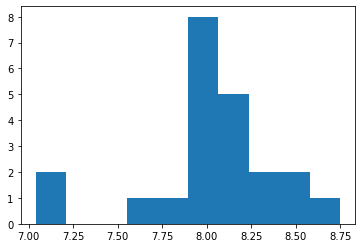

In [320]:
plt.hist(data[data['basin_name'] == 'Sabarmati Basin']['PH1'])
plt.show()

# The ph of water is neutral

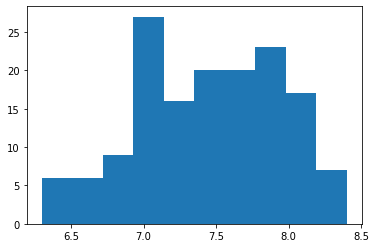

In [321]:
plt.hist(data[data['basin_name'] == 'Cauvery Basin']['PH1'])
plt.show()

# ph of water is neutral

In [322]:
data.head()

,state_name,district_name,block_name,basin_name,sub_basin_name,date_collection,BIOCHEMICAL OXYGEN DEMAND(mg/L),DISSOLVED OXYGEN(mg/L).1,PH1
0,Andhra Pradesh,Warangal,THORRUR,Godavari Basin,Pranhita and others,08-03-2021 00:00,2.1,5.4,7.31
1,Andhra Pradesh,KURNOOL,KURNOOL,Krishna Basin,Tungabhadra Lower,07-03-2021 00:00,2.8,5.0,7.70
2,Andhra Pradesh,KURNOOL,PAGIDYALA,Krishna Basin,Krishna Middle,14-03-2021 00:00,2.5,5.6,7.30
3,Andhra Pradesh,KRISHNA,JAGGAYYAPETA,Krishna Basin,Krishna Lower,24-03-2021 00:00,2.6,7.1,8.15
4,Andhra Pradesh,Warangal,THORRUR,Krishna Basin,Krishna Lower,10-03-2021 00:00,2.2,6.2,8.15


### Checking statewise ph level of the water

In [323]:
states = data.state_name.unique()

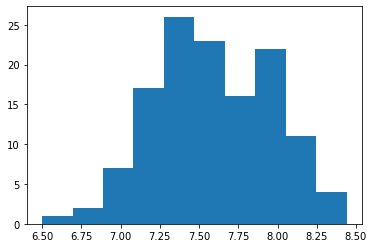

In [324]:
plt.hist(data[data['state_name'] == states[0]]['PH1'])
plt.show()

# Andhra Pradesh

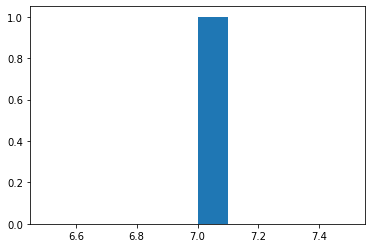

In [325]:
plt.hist(data[data['state_name'] == states[1]]['PH1'])
plt.show()

# Arunachal Pradesh

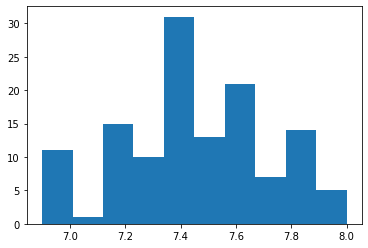

In [326]:
plt.hist(data[data['state_name'] == states[2]]['PH1'])
plt.show()

# Assam

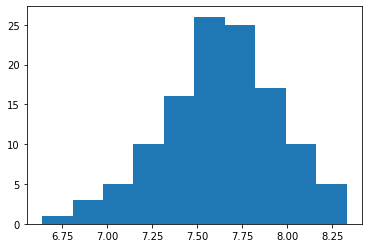

In [327]:
plt.hist(data[data['state_name'] == states[3]]['PH1'])
plt.show()

# Bihar

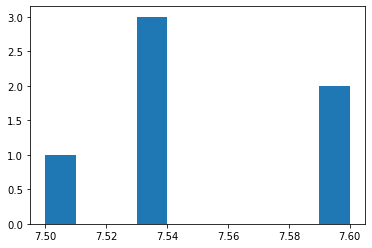

In [328]:
plt.hist(data[data['state_name'] == states[4]]['PH1'])
plt.show()

# Chandigarh

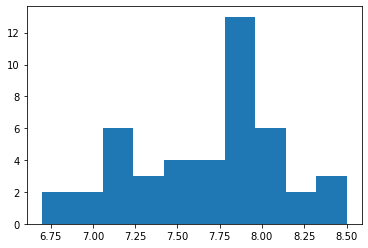

In [329]:
plt.hist(data[data['state_name'] == states[5]]['PH1'])
plt.show()

# Chattisgarh

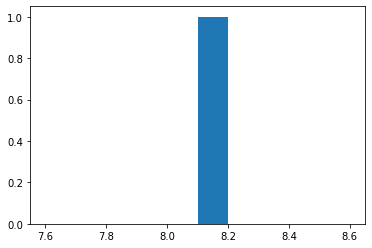

In [330]:
plt.hist(data[data['state_name'] == states[6]]['PH1'])
plt.show()

# Dadra and Nagar Haveli

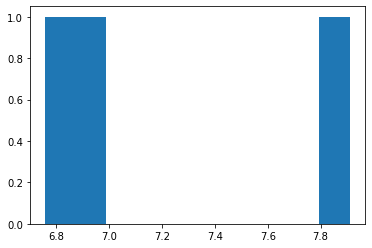

In [331]:
plt.hist(data[data['state_name'] == states[7]]['PH1'])
plt.show()

# Daman & Diu

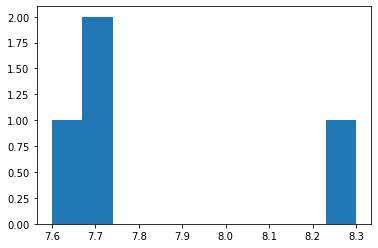

In [332]:
plt.hist(data[data['state_name'] == states[8]]['PH1'])
plt.show()

# Delhi

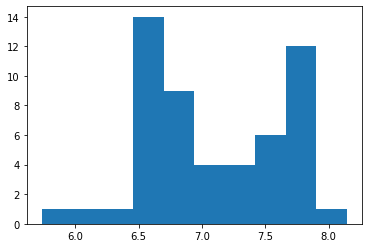

In [333]:
plt.hist(data[data['state_name'] == states[9]]['PH1'])
plt.show()

# Goa

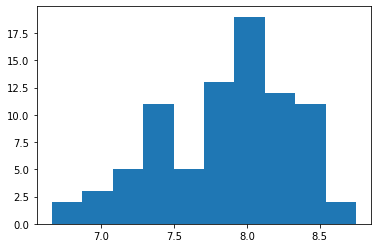

In [334]:
plt.hist(data[data['state_name'] == states[10]]['PH1'])
plt.show()

# Gujarat

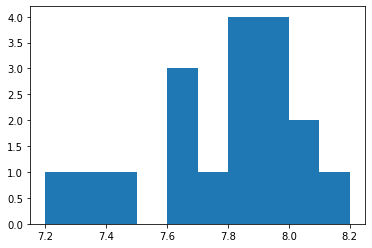

In [335]:
plt.hist(data[data['state_name'] == states[11]]['PH1'])
plt.show()

# Harayana

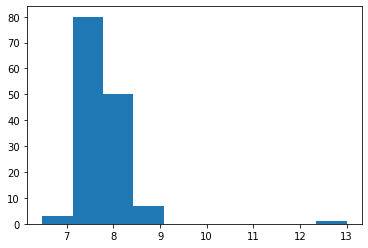

In [336]:
plt.hist(data[data['state_name'] == states[12]]['PH1'])
plt.show()

# Himachal Pradesh

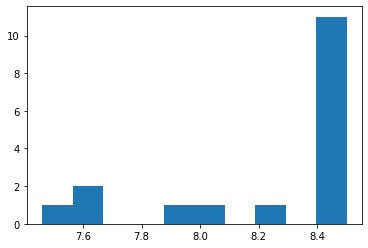

In [337]:
plt.hist(data[data['state_name'] == states[13]]['PH1'])
plt.show()

# Jammu and Kashmir

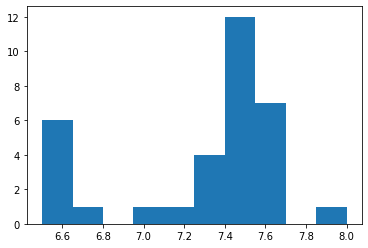

In [338]:
plt.hist(data[data['state_name'] == states[14]]['PH1'])
plt.show()

# Jharkhand

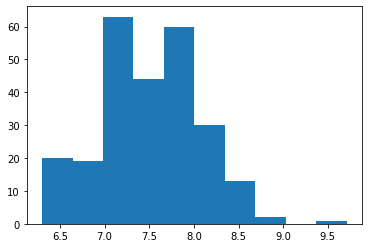

In [339]:
plt.hist(data[data['state_name'] == states[15]]['PH1'])
plt.show()

# Karnataka

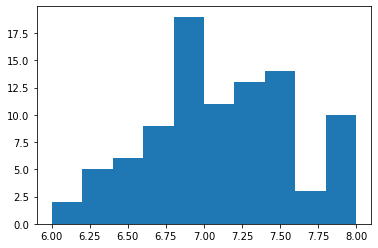

In [340]:
plt.hist(data[data['state_name'] == states[16]]['PH1'])
plt.show()

# Kerala

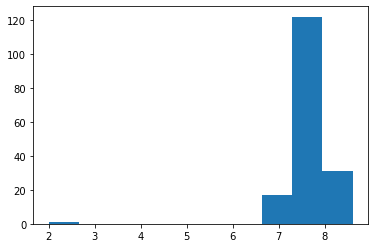

In [341]:
plt.hist(data[data['state_name'] == states[17]]['PH1'])
plt.show()

# Madhya Pradesh 
# There is presence of acidic water in Madhya Pradesh

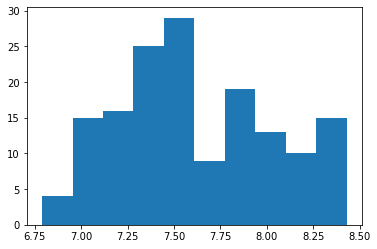

In [342]:
plt.hist(data[data['state_name'] == states[18]]['PH1'])
plt.show()

# Maharashtra

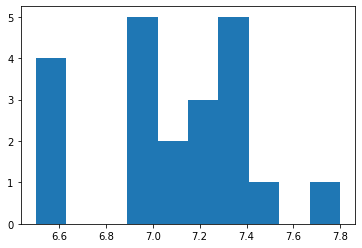

In [343]:
plt.hist(data[data['state_name'] == states[19]]['PH1'])
plt.show()

# Manipur

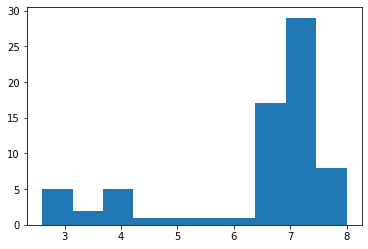

In [344]:
plt.hist(data[data['state_name'] == states[20]]['PH1'])
plt.show()

# Meghalaya
# There is presence of acidic water in Meghalaya

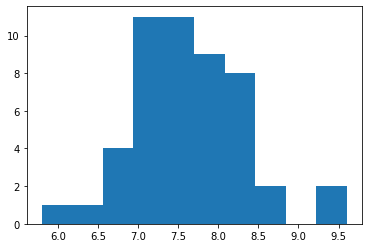

In [345]:
plt.hist(data[data['state_name'] == states[21]]['PH1'])
plt.show()

# Mizoram

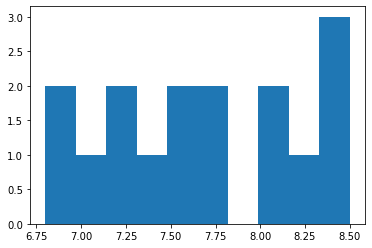

In [346]:
plt.hist(data[data['state_name'] == states[22]]['PH1'])
plt.show()

# Nagaland

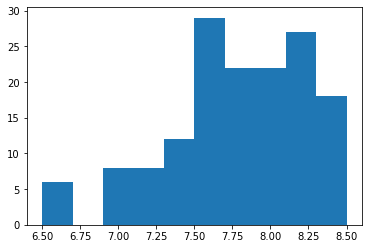

In [347]:
plt.hist(data[data['state_name'] == states[23]]['PH1'])
plt.show()

# Odisha

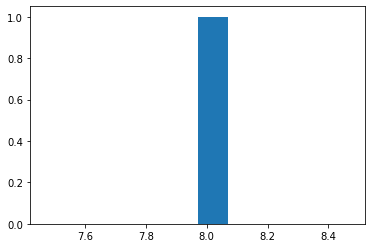

In [348]:
plt.hist(data[data['state_name'] == states[24]]['PH1'])
plt.show()

# Puducherry

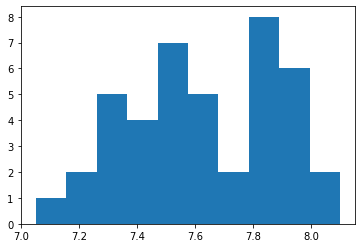

In [349]:
plt.hist(data[data['state_name'] == states[25]]['PH1'])
plt.show()

# Punjab

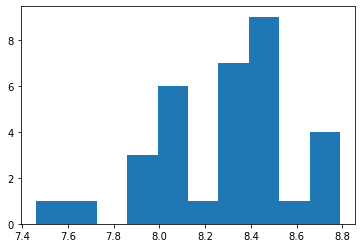

In [350]:
plt.hist(data[data['state_name'] == states[26]]['PH1'])
plt.show()

# Rajasthan

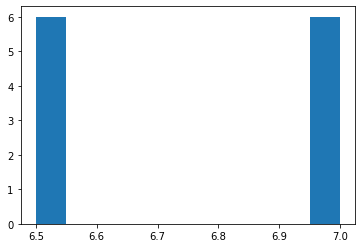

In [351]:
plt.hist(data[data['state_name'] == states[27]]['PH1'])
plt.show()

# Sikkim

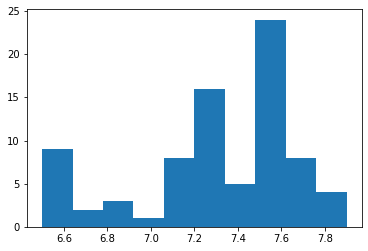

In [352]:
plt.hist(data[data['state_name'] == states[28]]['PH1'])
plt.show()

# Tamil Nadu

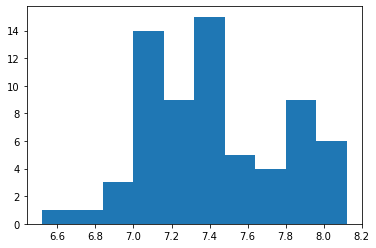

In [353]:
plt.hist(data[data['state_name'] == states[29]]['PH1'])
plt.show()

# Telangana

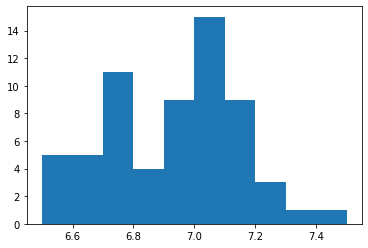

In [354]:
plt.hist(data[data['state_name'] == states[30]]['PH1'])
plt.show()

# Tripura

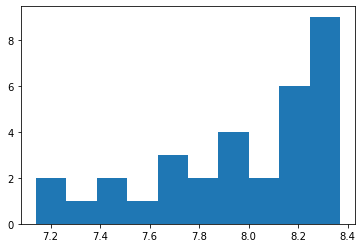

In [355]:
plt.hist(data[data['state_name'] == states[31]]['PH1'])
plt.show()

# Uttarakhand

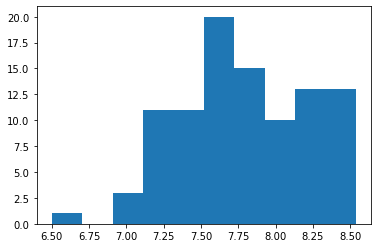

In [356]:
plt.hist(data[data['state_name'] == states[32]]['PH1'])
plt.show()

# Uttar Pradesh

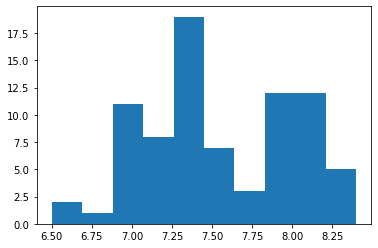

In [357]:
plt.hist(data[data['state_name'] == states[33]]['PH1'])
plt.show()

# West Bengal

In [358]:
# The ph of water is acidic in Madhya Pradesh and Meghalaya

<ipython-input-359-be93ca8bca6c>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (16, 16))


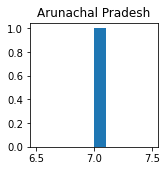

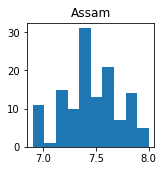

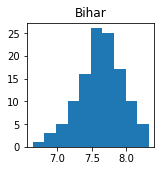

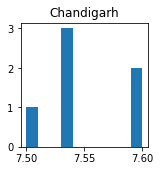

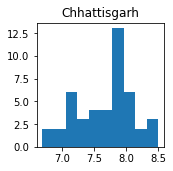

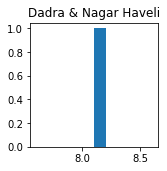

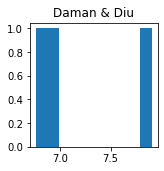

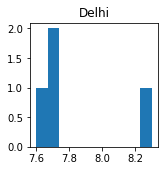

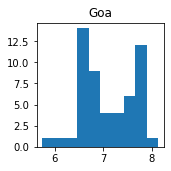

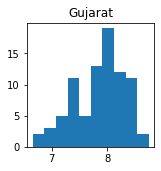

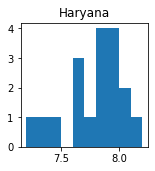

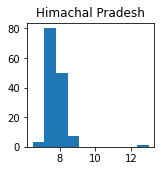

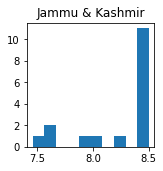

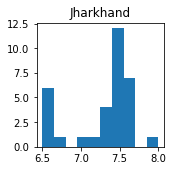

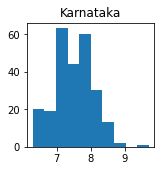

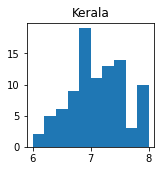

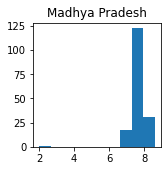

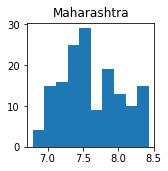

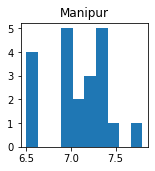

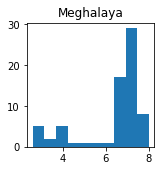

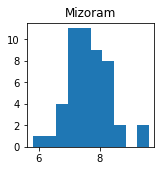

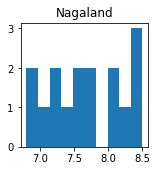

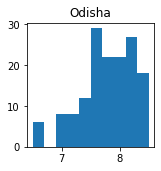

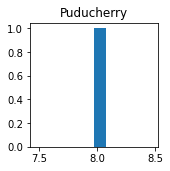

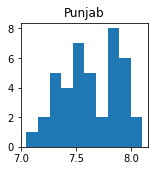

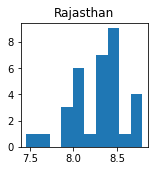

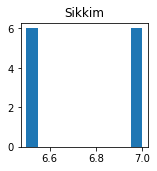

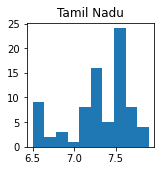

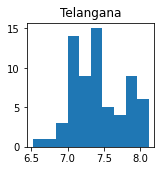

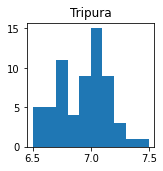

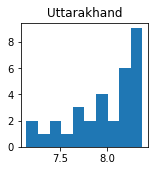

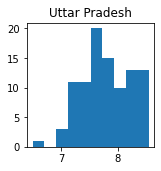

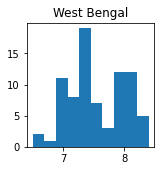

In [359]:
# We can see that the ph value of water in most of the states is nearly neutral and is suitable for drinking

for i in range(1, 34):
    plt.figure(figsize = (16, 16))
    plt.subplot(6, 6, i)
    plt.hist(data[data['state_name'] == states[i]]['PH1'])
    plt.title(states[i])

In [360]:
data.head()

,state_name,district_name,block_name,basin_name,sub_basin_name,date_collection,BIOCHEMICAL OXYGEN DEMAND(mg/L),DISSOLVED OXYGEN(mg/L).1,PH1
0,Andhra Pradesh,Warangal,THORRUR,Godavari Basin,Pranhita and others,08-03-2021 00:00,2.1,5.4,7.31
1,Andhra Pradesh,KURNOOL,KURNOOL,Krishna Basin,Tungabhadra Lower,07-03-2021 00:00,2.8,5.0,7.70
2,Andhra Pradesh,KURNOOL,PAGIDYALA,Krishna Basin,Krishna Middle,14-03-2021 00:00,2.5,5.6,7.30
3,Andhra Pradesh,KRISHNA,JAGGAYYAPETA,Krishna Basin,Krishna Lower,24-03-2021 00:00,2.6,7.1,8.15
4,Andhra Pradesh,Warangal,THORRUR,Krishna Basin,Krishna Lower,10-03-2021 00:00,2.2,6.2,8.15


In [361]:
data.describe()

,BIOCHEMICAL OXYGEN DEMAND(mg/L),DISSOLVED OXYGEN(mg/L).1,PH1
count,2265.000000,2265.000000,2265.000000
mean,6.850688,6.606541,7.529681
std,24.954577,1.887122,0.602722
min,1.100000,0.300000,2.000000
25%,1.800000,5.700000,7.200000
50%,2.800000,6.700000,7.533134
75%,6.846228,7.600000,7.900000
max,805.000000,25.000000,13.000000


C:\Users\91738\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


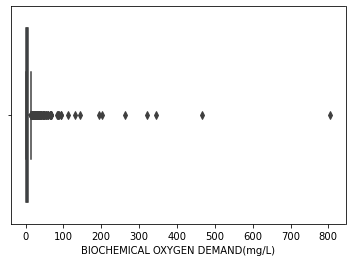

In [362]:
sns.boxplot(data['BIOCHEMICAL OXYGEN DEMAND(mg/L)'])

In [363]:
data = data[data['BIOCHEMICAL OXYGEN DEMAND(mg/L)'] < 100]

In [364]:
data.head()

,state_name,district_name,block_name,basin_name,sub_basin_name,date_collection,BIOCHEMICAL OXYGEN DEMAND(mg/L),DISSOLVED OXYGEN(mg/L).1,PH1
0,Andhra Pradesh,Warangal,THORRUR,Godavari Basin,Pranhita and others,08-03-2021 00:00,2.1,5.4,7.31
1,Andhra Pradesh,KURNOOL,KURNOOL,Krishna Basin,Tungabhadra Lower,07-03-2021 00:00,2.8,5.0,7.70
2,Andhra Pradesh,KURNOOL,PAGIDYALA,Krishna Basin,Krishna Middle,14-03-2021 00:00,2.5,5.6,7.30
3,Andhra Pradesh,KRISHNA,JAGGAYYAPETA,Krishna Basin,Krishna Lower,24-03-2021 00:00,2.6,7.1,8.15
4,Andhra Pradesh,Warangal,THORRUR,Krishna Basin,Krishna Lower,10-03-2021 00:00,2.2,6.2,8.15


In [365]:
data.shape

(2255, 9)

In [366]:
data.describe()

,BIOCHEMICAL OXYGEN DEMAND(mg/L),DISSOLVED OXYGEN(mg/L).1,PH1
count,2255.000000,2255.000000,2255.000000
mean,5.557342,6.607874,7.530664
std,8.452673,1.890171,0.602223
min,1.100000,0.300000,2.000000
25%,1.800000,5.700000,7.200000
50%,2.800000,6.700000,7.533134
75%,6.846228,7.600000,7.900000
max,94.000000,25.000000,13.000000


C:\Users\91738\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


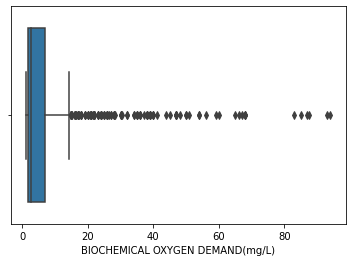

In [367]:
sns.boxplot(data['BIOCHEMICAL OXYGEN DEMAND(mg/L)'])

In [368]:
data[data['BIOCHEMICAL OXYGEN DEMAND(mg/L)'] > 15].shape

(122, 9)

In [369]:
data = data[data['BIOCHEMICAL OXYGEN DEMAND(mg/L)'] < 15]

In [370]:
data.head()

,state_name,district_name,block_name,basin_name,sub_basin_name,date_collection,BIOCHEMICAL OXYGEN DEMAND(mg/L),DISSOLVED OXYGEN(mg/L).1,PH1
0,Andhra Pradesh,Warangal,THORRUR,Godavari Basin,Pranhita and others,08-03-2021 00:00,2.1,5.4,7.31
1,Andhra Pradesh,KURNOOL,KURNOOL,Krishna Basin,Tungabhadra Lower,07-03-2021 00:00,2.8,5.0,7.70
2,Andhra Pradesh,KURNOOL,PAGIDYALA,Krishna Basin,Krishna Middle,14-03-2021 00:00,2.5,5.6,7.30
3,Andhra Pradesh,KRISHNA,JAGGAYYAPETA,Krishna Basin,Krishna Lower,24-03-2021 00:00,2.6,7.1,8.15
4,Andhra Pradesh,Warangal,THORRUR,Krishna Basin,Krishna Lower,10-03-2021 00:00,2.2,6.2,8.15


In [371]:
data.shape

(2125, 9)

C:\Users\91738\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


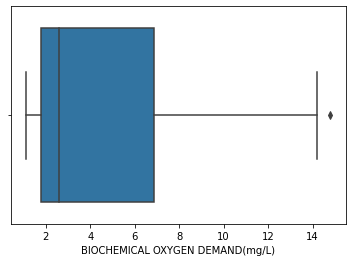

In [372]:
sns.boxplot(data['BIOCHEMICAL OXYGEN DEMAND(mg/L)'])

In [373]:
data.describe()

,BIOCHEMICAL OXYGEN DEMAND(mg/L),DISSOLVED OXYGEN(mg/L).1,PH1
count,2125.000000,2125.000000,2125.000000
mean,3.903627,6.725122,7.530841
std,2.793560,1.747295,0.610833
min,1.100000,0.400000,2.000000
25%,1.800000,5.800000,7.200000
50%,2.600000,6.800000,7.533134
75%,6.846228,7.700000,7.900000
max,14.800000,25.000000,13.000000


C:\Users\91738\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


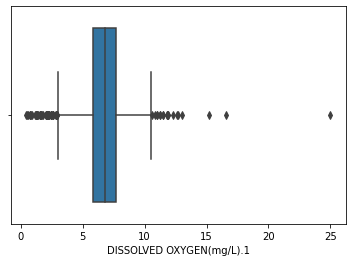

In [374]:
sns.boxplot(data['DISSOLVED OXYGEN(mg/L).1'])

In [375]:
data['DISSOLVED OXYGEN(mg/L).1'].describe()

count    2125.000000
mean        6.725122
std         1.747295
min         0.400000
25%         5.800000
50%         6.800000
75%         7.700000
max        25.000000
Name: DISSOLVED OXYGEN(mg/L).1, dtype: float64

In [376]:
# Removing the outliers

data = data[(data['DISSOLVED OXYGEN(mg/L).1'] > 3.5) & (data['DISSOLVED OXYGEN(mg/L).1'] < 10)]

C:\Users\91738\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


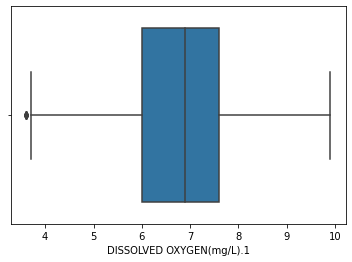

In [377]:
sns.boxplot(data['DISSOLVED OXYGEN(mg/L).1'])

In [378]:
data.shape

(1990, 9)

In [379]:
data.head()

,state_name,district_name,block_name,basin_name,sub_basin_name,date_collection,BIOCHEMICAL OXYGEN DEMAND(mg/L),DISSOLVED OXYGEN(mg/L).1,PH1
0,Andhra Pradesh,Warangal,THORRUR,Godavari Basin,Pranhita and others,08-03-2021 00:00,2.1,5.4,7.31
1,Andhra Pradesh,KURNOOL,KURNOOL,Krishna Basin,Tungabhadra Lower,07-03-2021 00:00,2.8,5.0,7.70
2,Andhra Pradesh,KURNOOL,PAGIDYALA,Krishna Basin,Krishna Middle,14-03-2021 00:00,2.5,5.6,7.30
3,Andhra Pradesh,KRISHNA,JAGGAYYAPETA,Krishna Basin,Krishna Lower,24-03-2021 00:00,2.6,7.1,8.15
4,Andhra Pradesh,Warangal,THORRUR,Krishna Basin,Krishna Lower,10-03-2021 00:00,2.2,6.2,8.15


In [380]:
np.min(data['date_collection'])

'01-03-2021 00:00'

In [381]:
np.max(data['date_collection'])

'31-03-2021 00:00'

In [385]:
data['date_collection'].unique()

array(['08-03-2021 00:00', '07-03-2021 00:00', '14-03-2021 00:00',
       '24-03-2021 00:00', '10-03-2021 00:00', '05-03-2021 00:00',
       '04-03-2021 00:00', '02-03-2021 00:00', '15-03-2021 00:00',
       '09-03-2021 00:00', '06-03-2021 00:00', '20-03-2021 00:00',
       '25-03-2021 00:00', '01-03-2021 00:00', '12-03-2021 00:00',
       '03-03-2021 00:00', '31-03-2021 00:00', '16-03-2021 00:00',
       '17-03-2021 00:00', '13-03-2021 00:00', '22-03-2021 00:00',
       '18-03-2021 00:00', '26-03-2021 00:00', '23-03-2021 00:00',
       '11-03-2021 00:00', '27-03-2021 00:00', '19-03-2021 00:00',
       '30-03-2021 00:00', '21-03-2021 00:00'], dtype=object)

In [382]:
# These records are only for the 3rd month of 2021

In [383]:
data.head()

,state_name,district_name,block_name,basin_name,sub_basin_name,date_collection,BIOCHEMICAL OXYGEN DEMAND(mg/L),DISSOLVED OXYGEN(mg/L).1,PH1
0,Andhra Pradesh,Warangal,THORRUR,Godavari Basin,Pranhita and others,08-03-2021 00:00,2.1,5.4,7.31
1,Andhra Pradesh,KURNOOL,KURNOOL,Krishna Basin,Tungabhadra Lower,07-03-2021 00:00,2.8,5.0,7.70
2,Andhra Pradesh,KURNOOL,PAGIDYALA,Krishna Basin,Krishna Middle,14-03-2021 00:00,2.5,5.6,7.30
3,Andhra Pradesh,KRISHNA,JAGGAYYAPETA,Krishna Basin,Krishna Lower,24-03-2021 00:00,2.6,7.1,8.15
4,Andhra Pradesh,Warangal,THORRUR,Krishna Basin,Krishna Lower,10-03-2021 00:00,2.2,6.2,8.15
